# Решение оптимизационных задач в SciPy

Импортируем модуль для решения оптимизационных задач из библиотеки SciPy и определим функцию, на которой будем тестировать методы. Это будет функция Розенброка, на которой часто тестируют алгоритмы оптимизации. Она имеет минимум в точке (1, 1) и очень пологий "желоб" в котором этот минимум находится.

In [1]:
from scipy import optimize

def f(x):   # The rosenbrock function
     return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
    
f([1, 1])

0.0

Для начала посмотрим, что дает простой перебор из той же библиотеки:

In [2]:
optimize.brute(f, ((-1, 2), (-1, 2)))

array([1.00001462, 1.00001547])

Если функция очень зашумленная и ни о какой гладкости нет и речи, может быть полезен метод иммитации отжига (anneal simulation). Однако для гладких функций результат применения отжига обычно не впечатляет:

In [6]:
from scipy import optimize

optimize.differential_evolution(f, [[-1, 2], [-1, 2]])

     fun: 1.8488927466117464e-32
 message: 'Optimization terminated successfully.'
    nfev: 3513
     nit: 116
 success: True
       x: array([1., 1.])

In [5]:
?optimize.differential_evolution

Добавим функцию, вычисляющую градиент функции Розенброка:

In [8]:
import numpy as np

def fprime(x):
        return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

Разработчики SciPy позаботились о том, чтобы мы не пытались что-то решать с неправильно посчитанным градиентом и предусмотрели функцию проверки градиента. Она возвращает норму разности нашего градиента и оцененного численно (в заданной точке, в данном случае - [2 2]).

In [9]:
optimize.check_grad(f, fprime, [2, 2])

2.384185791015625e-07

Если функция у вас гладкая, даже если нет посчитанного градиента (в нашем случае вы можете передать градиент как параметр функции fmin_bfgs), пользуйтесь по умолчанию bfgs или его вариациями:

In [14]:

optimize.fmin_bfgs(f, [2, 2], fprime=fprime)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9


array([1.00000582, 1.00001285])

In [12]:
?optimize.fmin_bfgs

Благодаря разработчикам SciPy, эта рекомендация находит свое отражение в том, какой метод по умолчанию использует функция minimize:

In [15]:
optimize.minimize(f, [2, 2])

      fun: 1.7838045907468558e-11
 hess_inv: array([[0.95489061, 1.90006632],
       [1.90006632, 4.27872378]])
      jac: array([9.88093227e-07, 2.41749084e-06])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([1.00000573, 1.00001265])

## Пример одномерной минимизации и анимации

(попробуйте запустить отдельно от ipython notebook)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 44


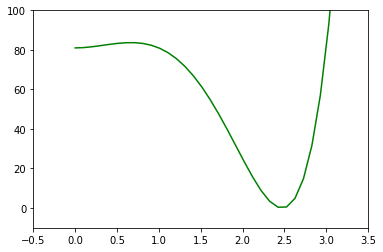

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.optimize as si
import scipy.optimize as so

fig = plt.figure()
ax = plt.axes(xlim=(-0.5, 3.5), ylim=(-10, 100))
line, = ax.plot([], [], 'o')

def F(x):
        return (x**3-x**2-9.)**2

#get the optimize progress
res_x = []
so.fmin(F, -9, callback=res_x.append)
res_x = np.array(res_x).ravel()
res_y = F(res_x)

def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    line.set_data(res_x[i], res_y[i])
    return line,

#print type(animate(0))

ax.plot(np.linspace(0,10,100), F(np.linspace(0,10,100)), 'g')
#frames is the length of res_x
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(res_x), interval=200, blit=True)
plt.show()